# K-Means Exercise:  Student Clusters


What is differentiated instruction, and why do you care?

If you are interested in diminishing  inequities in your practice, your department, your college, or your institution, what is the measure of that disparate impact?  What are the methods of intervention you will consider?  What data sources will you look at?  

Observing available data "bootstraps" this process of bringing to light inequities in a practice or in a system.  Participatory  Action Research (PAR) is a framework that helps us think about our students, our practice, and our institution. 

Take a look at the following table of hypothetical student scores in Math and Physics:



| Student | Physics | Math |
| ------- | ------- | ---- |
| P       | 15      | 20   |
| Q       | 20      | 15   |
| R       | 26      | 21   |
| X       | 44      | 52   |
| Y       | 50      | 45   |
| Z       | 57      | 38   |
| A       | 80      | 85   |
| B       | 90      | 88   |
| C       | 98      | 98   |


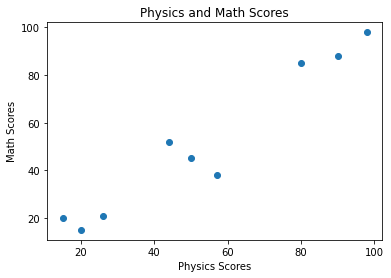

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Physics and Math scores as ordered pairs
#besX = np.array([[15,20],[20,15],[26,21],[44,52],[50,45],[57,38],[80,85],[90,88],[98,98] ])   #this works. Offer as orderd pairs

# Or using 4 lines
physicsScores = np.array([15,20,26,44,50,57,80,90,98])
mathScores    = np.array([20,15,21,52,45,38,85,88,98])
besPairedList = [[x,y] for x,y in zip(physicsScores, mathScores)  ]   #forms ordered pairs
X = np.array(besPairedList)

plt.scatter(X[:, 0], X[:, 1])  # X[:,0] = all rows, column 0 (Physics), X[:,-1] = X[:,size-1] = x[:,1]
plt.title('Physics and Math Scores' )
plt.xlabel('Physics Scores')
plt.ylabel('Math Scores')
plt.show()

In [77]:
from sklearn.cluster import KMeans


# COMPUTE K-MEANS Clustering

# Use Scikit to analyze data and produce
kmeans = KMeans(n_clusters=3, random_state=0)

# Computer K-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
kmeans.predict(X)  # set indices of appropriate clusters

print("Centroids:")
print(kmeans.cluster_centers_)  # show the centroids (k centroids for  k clusters)

print("Cluster assignments: ")
categories=kmeans.labels_ 
print(categories)           # show the k classes (0 or 1) that each ordered pair belongs in 



Centroids:
[[50.33333333 45.        ]
 [89.33333333 90.33333333]
 [20.33333333 18.66666667]]
Cluster assignments: 
[2 2 2 0 0 0 1 1 1]


# Basic Plotting
In order to see  the data points and the centroids, we'll plot both.  For the next run, we want to plot clusters and centroids by color.

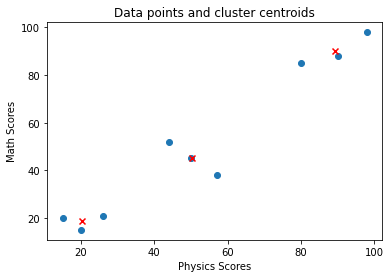

In [75]:

plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.xlabel('Physics Scores')
plt.ylabel('Math Scores')
plt.show()

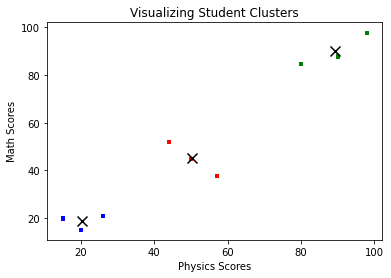

array([[15, 20],
       [20, 15],
       [26, 21],
       [44, 52],
       [50, 45],
       [57, 38],
       [80, 85],
       [90, 88],
       [98, 98]])

In [76]:

colormap = np.array(['r', 'g', 'b'])

plt.scatter(X[:, 0], X[:, 1], s=10, c=colormap[categories], marker=',')

# Show cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=100, marker='x')


plt.title('Visualizing Student Clusters')
plt.xlabel('Physics Scores')
plt.ylabel('Math Scores')

plt.savefig('ScatterClassPlot.png')
plt.show()
X

It appears that we have 3 clusters in our graph.  Could this happen in reality? Is this information 
that you want to know about as a counselor, caculty, or school dean?  Is it important enough to you to try do something about the clustering you see?

If you undergo an attempt to diminish the disparities, what questions will you ask?  If you wish to research the efficacy of your interventions, what data will you look at? What pre and post-tests will you perform in your research?  And in this  research" endeavor, who is the subject?  Yourself, the students, the institution?  The [Participatory Action Research](https://en.wikipedia.org/wiki/Participatory_action_research)  framework starts with the idea that there are multiple participants in this research.

# Evaluating the Cluster: silhouette scores

- value b/t 1 and -1
- 1 is best for any single data point
- -1 is worst
- values near zero indicate overlapping clusters
- Can be used to determine an adequate value for k

In [45]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.73739572946484


# Resources and References


### K-Means Help

A basic K-means [clustering tutorial](https://www.machinecurve.com/index.php/2020/04/16/how-to-perform-k-means-clustering-with-python-in-scikit/)

Another wonderfully simple  tutorial is [here](https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/)

A  _detailed_ and rather thorough reference on scikit API and proper use of [clustering library](https://scikit-learn.org/stable/modules/clustering.html).

Overal scikit user guide is [here](https://scikit-learn.org/stable/user_guide.html)


#### Standardization:
The subject scores here do not need standardization, but if were working with variables between 0 and 1, and another variable between 0 and 100, the larger variable would dominate, leading to biased results.  Each value of each variable can be converted to a standard z-score to place them all on the same scale

$z=\frac{x-\mu}{\sigma}$

#### Covariance Computations:
Are the variables related to one another? Is there any correlation?  Compute the covariance matrix to determine if there's redundant information, thereby allowing us to reduce dimensionality.

#### Eigenvalues and PCA
Computer the eigenvalues in order to determine the _principal components_ of the data.  Not all data is highly correlated, so not all information is highly predictive: the correlation coefficient ($\r^2$) was useful in elementary statistics for revealing the percentage of explained variance.  Data that don't explain the variance, do not capture significant amounts of information. 
[Tutorial1](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) which is derived from  [this here](http://strata.uga.edu/8370/handouts/pcaTutorial.pdf)



### K-Means applied
[Looking at student feedback, UCI data: Identifying Hidden Patterns in Students' Feedback through Cluster Analysis](http://www.ijcte.org/vol7/923-V018.pdf)

### Plotting Help

Plotting:  [Creating a scatter plot with multiple colors](https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)
Changing plot marker [symbols](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
